In [0]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(df)
standardized_data.shape


In [0]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(df)
standardized_data.shape


In [0]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(raw_df) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  

In [0]:
### Importing the Required Libraries

from sklearn.decomposition import PCA   # Principal Component Analysis

from sklearn.datasets import fetch_openml

from mpl_toolkits import mplot3d ## for 3D Visualization

from sklearn.manifold import TSNE  # T-Distributed  Stochastic Neighbour Embedding
import time

from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import DBSCAN   #  Density-Based  Spatial Clustering of  Applications

from sklearn.cluster import KMeans  # K-Means Clustering 

from mlxtend.frequent_patterns import apriori, association_rules  # Associative Rule: Apriori Algorithm

from mlxtend.preprocessing import TransactionEncoder

In [0]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [0]:
# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline


from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split,GridSearchCV  # to split the data into two parts
from sklearn.model_selection import KFold, cross_val_score  # use for K- fold cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score,average_precision_score, precision_score, confusion_matrix, classification_report

In [0]:
dataset = pd.read_csv('data.csv')
dataset.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from featexp import univariate_plotter
from featexp import get_trend_stats
from featexp import get_univariate_plots

In [0]:
print('This dataset contains ',dataset.shape[0],'rows')
print('This dataset contains ',dataset.shape[1],'columns')

This dataset contains  569 rows
This dataset contains  33 columns


In [0]:
# Converted to binary the target to help later on with models and plots

dataset['diagnosis'] = dataset['diagnosis'].map({'M':1, 'B':0})

In [0]:
# delete the Unnamed Column that seems irrelevant

del dataset['Unnamed: 32']

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


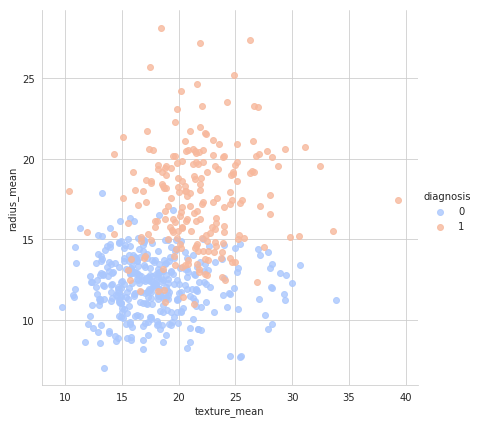

In [0]:
sns.set_style('whitegrid')
sns.lmplot('texture_mean','radius_mean',data=dataset, hue='diagnosis',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


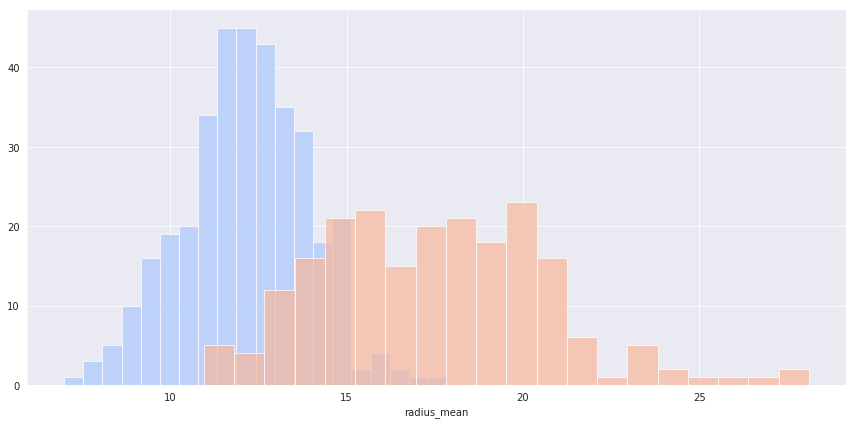

In [0]:
sns.set_style('darkgrid')
g = sns.FacetGrid(dataset,hue="diagnosis",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'radius_mean',bins=20,alpha=0.7)

Create a similar histogram for the Grad.Rate column.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


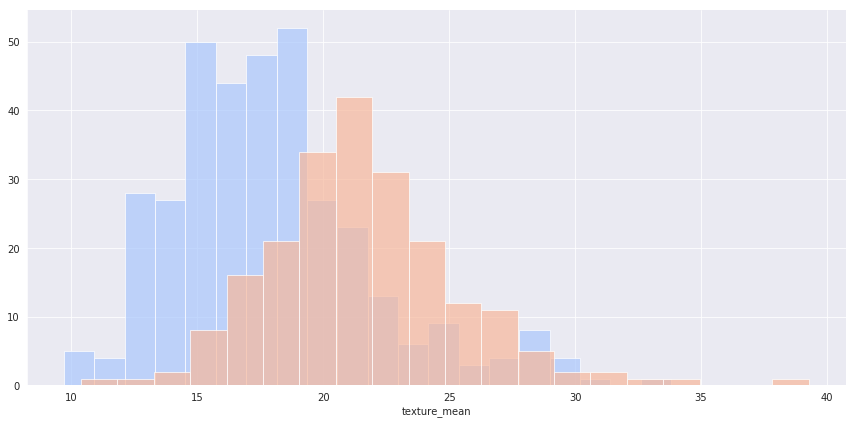

In [0]:
sns.set_style('darkgrid')
g = sns.FacetGrid(dataset,hue="diagnosis",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'texture_mean',bins=20,alpha=0.7)

In [0]:
dataset.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


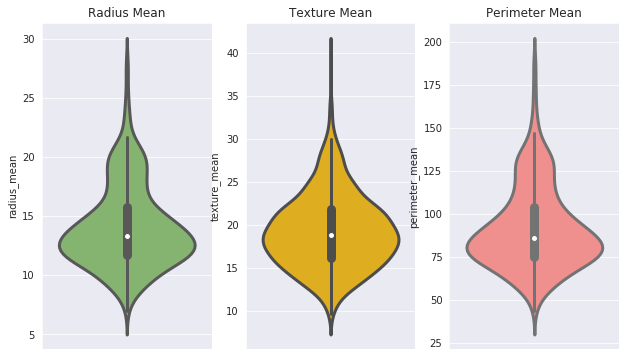

In [0]:
plt.figure(figsize=(14,6))
plt.subplot(1, 4, 1)
plt.title('Radius Mean')
sns.violinplot(y='radius_mean',data=dataset,palette='summer',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('Texture Mean')
sns.violinplot(y='texture_mean',data=dataset,palette='Wistia_r',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('Perimeter Mean')
sns.violinplot(y='perimeter_mean',data=dataset,palette='spring',linewidth=3)
plt.show()

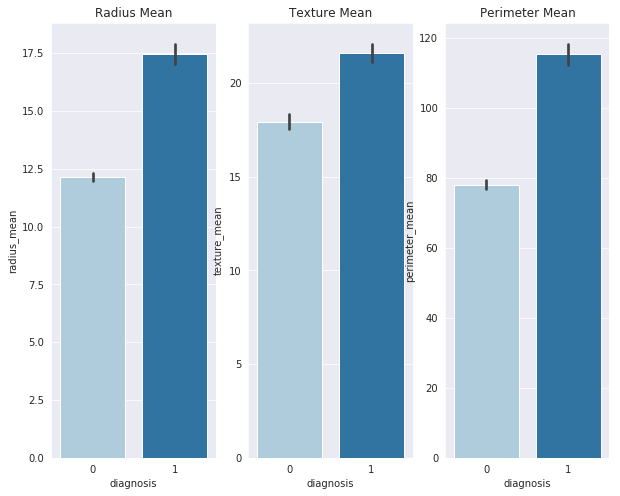

In [0]:
plt.figure(figsize=(10,8))
plt.subplot(1, 3, 1)
plt.title('Radius Mean')
sns.barplot(x='diagnosis',y='radius_mean',data=dataset, palette='Paired')
plt.subplot(1, 3, 2)
plt.title('Texture Mean')
sns.barplot(x='diagnosis',y='texture_mean',data=dataset,palette='Paired')
plt.subplot(1, 3, 3)
plt.title('Perimeter Mean')
sns.barplot(x='diagnosis',y='perimeter_mean',data=dataset,palette='Paired')
plt.show()

# hue="", 

In [0]:
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
sns.barplot(x='test preparation course',y='math score',data=df,hue='gender',palette='summer')
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course',y='reading score',data=df,hue='gender',palette='summer')
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course',y='writing score',data=df,hue='gender',palette='summer')
plt.title('WRITING SCORES')
plt.show()

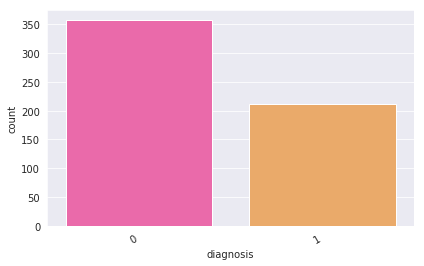

In [0]:
fig,ax=plt.subplots()
sns.countplot(x='diagnosis',data=dataset,palette='spring')
plt.tight_layout()
fig.autofmt_xdate()


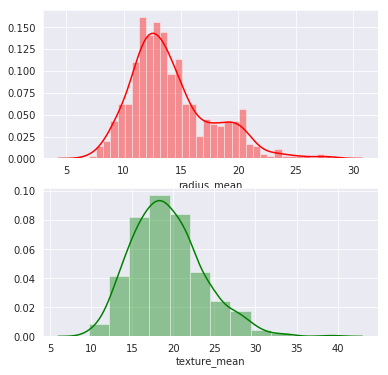

In [0]:
plt.figure(figsize=(6,6))
plt.subplot(2, 1, 1)
sns.distplot(dataset['radius_mean'],bins=34,color='Red')
plt.subplot(2, 1, 2)
sns.distplot(dataset['texture_mean'],bins=12,color='Green')

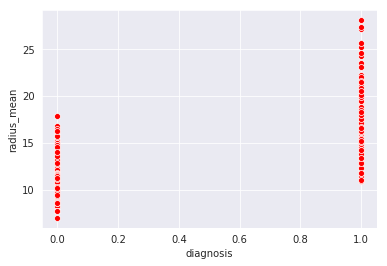

In [0]:
sns.scatterplot(x='diagnosis',y='radius_mean',data=dataset,color='Red')

In [0]:
fig, ax = pyplot.subplots(figsize=(15,8))
sns.barplot(x='texture_mean',y='diagnosis',data=dataset)
plt.show()

In [0]:
fig, ax = pyplot.subplots(figsize=(15,8))
sns.barplot(x='TOEFL Score',y='Chance of Admit',data=co_toefel)
plt.show()

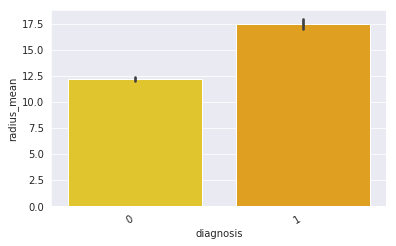

In [0]:
fig,ax=plt.subplots()
sns.barplot(x=dataset['diagnosis'],y='radius_mean',data=dataset,palette='Wistia')
fig.autofmt_xdate()

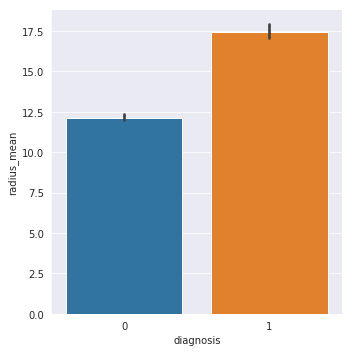

In [0]:

sns.factorplot(x='diagnosis', y='radius_mean', data=dataset, kind='bar')

In [0]:
sns.set(style='whitegrid')
ax=sns.barplot(x=data['Gender'].value_counts().index,y=data['Gender'].value_counts().values,palette="Blues_d",hue=['female','male'])
plt.legend(loc=8)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Show of Gender Bar Plot')
plt.show()

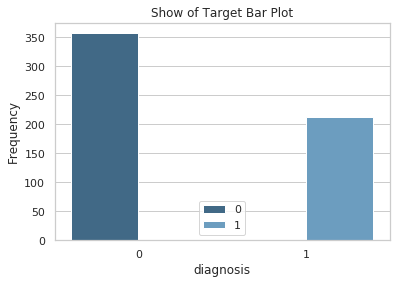

In [0]:
sns.set(style='whitegrid')
ax=sns.barplot(x=dataset['diagnosis'].value_counts().index,y=dataset['diagnosis'].value_counts().values,palette="Blues_d",hue=[0, 1])
plt.legend(loc=8)
plt.xlabel('diagnosis')
plt.ylabel('Frequency')
plt.title('Show of Target Bar Plot')
plt.show()

### 26. Spider Graph   The Radar Chart

#### Draw the Radar Chart

 We want to show the smoothness_mean', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean  as 6 different axes on our radar chart, so just take them out and set as a np.array. 
 
 Here we use the No.386 pokemon as an example to illustrate the chart.

In [0]:
labels=np.array(['smoothness_mean', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'])
stats=dataset.loc[386,labels].values



Set the angle of polar axis. And here we need to use the np.concatenate to draw a closed plot in radar chart.

In [0]:
# Applying the Mean Function to show stats of all the Pokemons on one radar plot


## stats=df.loc[:,labels].mean()


In [0]:
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

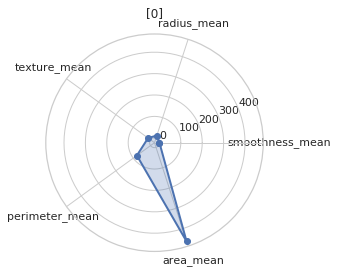

In [0]:

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title([dataset.loc[386,"diagnosis"]])
ax.grid(True)

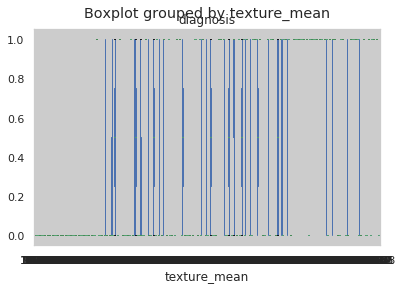

In [0]:
dataset.boxplot(column='diagnosis',by = 'texture_mean')

#### 24.Residual Plot :

The most useful way to plot the residuals, though, is with your predicted values on the x-axis, and your residuals on the y-axis. The distance from the line at 0 is how bad the prediction was for that value.

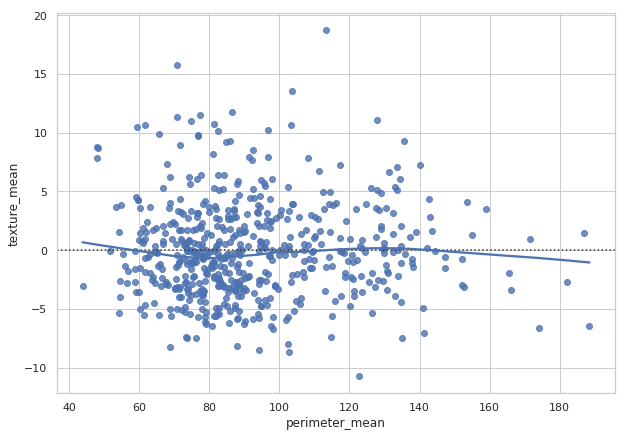

In [0]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.residplot('perimeter_mean', 'texture_mean',data=dataset,lowess=True)

In [0]:
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
from matplotlib import pyplot

In [0]:
def detect_outliers(dataset,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(dataset[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(dataset[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = dataset[(dataset[col] < Q1 - outlier_step) | (dataset[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   
outliers_to_drop=detect_outliers(dataset,2,['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean','compactness_mean', 'concavity_mean'])

Since outliers can have a dramatic effect on the prediction (especially for regression problems), I chose to manage them.

I used the Tukey method (Tukey JW., 1977) to detect ouliers which defines an interquartile range comprised between the 1st and 3rd quartile of the distribution values (IQR). An outlier is a row that have a feature value outside the (IQR +- an outlier step).

I decided to detect outliers from the numerical values features (GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research). Then, i considered outliers as rows that have at least two outlied numerical values

In [0]:
dataset.loc[outliers_to_drop] # Show the outliers rows

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,8611555,1,25.22,24.91,171.5,1878.0,0.10630,0.2665,0.3339,0.18450,0.1829,0.06782,0.8973,1.4740,7.382,120.00,0.008166,0.05693,0.05730,0.02030,0.01065,0.005893,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,86355,1,22.27,19.67,152.8,1509.0,0.13260,0.2768,0.4264,0.18230,0.2556,0.07039,1.2150,1.5450,10.050,170.00,0.006515,0.08668,0.10400,0.02480,0.03112,0.005037,28.40,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,865423,1,24.25,20.20,166.2,1761.0,0.14470,0.2867,0.4268,0.20120,0.2655,0.06877,1.5090,3.1200,9.807,233.00,0.023330,0.09806,0.12780,0.01822,0.04547,0.009875,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
164,8712289,1,23.27,22.04,152.1,1686.0,0.08439,0.1145,0.1324,0.09702,0.1801,0.05553,0.6642,0.8561,4.603,97.85,0.004910,0.02544,0.02822,0.01623,0.01956,0.003740,28.01,28.22,184.2,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187
180,873592,1,27.22,21.87,182.1,2250.0,0.10940,0.1914,0.2871,0.18780,0.1800,0.05770,0.8361,1.4810,5.820,128.70,0.004631,0.02537,0.03109,0.01241,0.01575,0.002747,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
202,878796,1,23.29,26.67,158.9,1685.0,0.11410,0.2084,0.3523,0.16200,0.2200,0.06229,0.5539,1.5600,4.667,83.16,0.009327,0.05121,0.08958,0.02465,0.02175,0.005195,25.12,32.68,177.0,1986.0,0.1536,0.4167,0.7892,0.2733,0.3198,0.08762
212,8810703,1,28.11,18.47,188.5,2499.0,0.11420,0.1516,0.3201,0.15950,0.1648,0.05525,2.8730,1.4760,21.980,525.60,0.013450,0.02772,0.06389,0.01407,0.04783,0.004476,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
236,88299702,1,23.21,26.97,153.5,1670.0,0.09509,0.1682,0.1950,0.12370,0.1909,0.06309,1.0580,0.9635,7.247,155.80,0.006428,0.02863,0.04497,0.01716,0.01590,0.003053,31.01,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677
339,89812,1,23.51,24.27,155.1,1747.0,0.10690,0.1283,0.2308,0.14100,0.1797,0.05506,1.0090,0.9245,6.462,164.10,0.006292,0.01971,0.03582,0.01301,0.01479,0.003118,30.67,30.73,202.4,2906.0,0.1515,0.2678,0.4819,0.2089,0.2593,0.07738
352,899987,1,25.73,17.46,174.2,2010.0,0.11490,0.2363,0.3368,0.19130,0.1956,0.06121,0.9948,0.8509,7.222,153.10,0.006369,0.04243,0.04266,0.01508,0.02335,0.003385,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815


There are no outliers because all the values are inside a fixed range and none of them go lower/beyond that range which therefore produces no outliers

In [0]:
pip install featexp